<a href="https://colab.research.google.com/github/adbc09/Python-FALL2025/blob/main/CAPSTONE_PROJECT_PYTHON_CYCLE11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPSTONE PROJECT
________________________________________________________________________________

- NYC Restaurant Inspection Results.
- Have NYC restaurant inspection scores improved over time?
- Restaurant inspections are critical to public health. Understanding whether inspection
scores are improving over time can help evaluate the effectiveness of NYC food safety
regulations and enforcement efforts.
--------------------------------------------------------------------------------


- Importing libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

- Loading the Data

In [ ]:
file_path = '/content/DOHMH_New_York_City_Restaurant_Inspection_Results_20260126.csv'
df = pd.read_csv(file_path, engine='python', on_bad_lines='skip')

- Loading the Data

In [ ]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location
0,50168852,SPICE LAMB,Manhattan,928,AMSTERDAM AVE,10025.0,6469848768,NaN,01/01/1900,NaN,...,NaN,40.800130,-73.965943,107.0,7.0,19100.0,1056616.0,1.018770e+09,MN12,POINT (-73.9659433495 40.800129759658)
1,50179742,LA VENTANA,Queens,54-20,BROADWAY,11377.0,6462464060,NaN,01/01/1900,NaN,...,NaN,40.753021,-73.906377,402.0,26.0,25500.0,4545010.0,4.011930e+09,QN63,POINT (-73.906377296437 40.753021336026)
2,50093485,VECHE 7 ENTERTAINEMENT,Queens,3613,164TH ST,11358.0,7186870621,NaN,01/01/1900,NaN,...,NaN,40.762569,-73.801786,407.0,19.0,117500.0,4119567.0,4.052870e+09,QN51,POINT (-73.801786027547 40.76256912241)
3,50172518,KLIO RESTAURANT & BAR,Queens,10702,QUEENS BLVD,11375.0,7182472545,NaN,01/01/1900,NaN,...,NaN,40.721823,-73.846202,406.0,29.0,71100.0,4077483.0,4.032388e+09,QN17,POINT (-73.846202430368 40.721822557273)
4,50177804,MAD RADIO NYC,Brooklyn,395,WYTHE AVE,11249.0,7862410411,NaN,01/01/1900,NaN,...,NaN,40.711126,-73.966544,301.0,34.0,54900.0,3251760.0,3.024700e+09,BK73,POINT (-73.96654448749 40.711125620758)


In [ ]:
df.tail()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location
296613,50064374,CERVO'S,Manhattan,43,CANAL STREET,10002.0,2122262545,Seafood,11/25/2025,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.714751,-73.991393,103.0,1.0,1600.0,1003857.0,1.002980e+09,MN27,POINT (-73.991393077194 40.714750528329)
296614,50143250,HIDE ROOFTOP,Manhattan,24,JOHN STREET,10038.0,9173635827,American,04/24/2024,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.709758,-74.008765,101.0,1.0,1502.0,1001105.0,1.000650e+09,MN25,POINT (-74.008764983167 40.709757781227)
296615,50104422,FLIK INTERNATIONAL,Manhattan,1271,6 AVENUE,10020.0,7043285090,Other,04/10/2024,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.760282,-73.980157,105.0,4.0,13100.0,1022709.0,1.010030e+09,MN17,POINT (-73.98015728348 40.760282020579)
296616,50046491,FULEEN PALACE,Queens,10,COLEMAN SQUARE,11414.0,7188485877,Chinese,03/23/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.660131,-73.830472,410.0,32.0,88400.0,4295510.0,4.141820e+09,QN57,POINT (-73.830471868849 40.660130704508)
296617,50108895,MINT HEIGHTS,Brooklyn,46,HENRY STREET,11201.0,3479160325,Indian,03/25/2024,Establishment Closed by DOHMH. Violations were...,...,Cycle Inspection / Re-inspection,40.699580,-73.991994,302.0,33.0,100.0,3001604.0,3.002160e+09,BK09,POINT (-73.991993711657 40.699580226987)


In [ ]:
df.shape

(296618, 27)

In [ ]:
df.columns.tolist()

['CAMIS',
 'DBA',
 'BORO',
 'BUILDING',
 'STREET',
 'ZIPCODE',
 'PHONE',
 'CUISINE DESCRIPTION',
 'INSPECTION DATE',
 'ACTION',
 'VIOLATION CODE',
 'VIOLATION DESCRIPTION',
 'CRITICAL FLAG',
 'SCORE',
 'GRADE',
 'GRADE DATE',
 'RECORD DATE',
 'INSPECTION TYPE',
 'Latitude',
 'Longitude',
 'Community Board',
 'Council District',
 'Census Tract',
 'BIN',
 'BBL',
 'NTA',
 'Location']

In [ ]:
df.dtypes

,0
CAMIS,int64
DBA,object
BORO,object
BUILDING,object
STREET,object
ZIPCODE,float64
PHONE,object
CUISINE DESCRIPTION,object
INSPECTION DATE,object
ACTION,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296618 entries, 0 to 296617
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  296618 non-null  int64  
 1   DBA                    296615 non-null  object 
 2   BORO                   296618 non-null  object 
 3   BUILDING               295762 non-null  object 
 4   STREET                 296617 non-null  object 
 5   ZIPCODE                293692 non-null  float64
 6   PHONE                  296608 non-null  object 
 7   CUISINE DESCRIPTION    293357 non-null  object 
 8   INSPECTION DATE        296618 non-null  object 
 9   ACTION                 293365 non-null  object 
 10  VIOLATION CODE         291074 non-null  object 
 11  VIOLATION DESCRIPTION  291073 non-null  object 
 12  CRITICAL FLAG          296618 non-null  object 
 13  SCORE                  280294 non-null  float64
 14  GRADE                  146413 non-nu

In [ ]:
df.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,2.966180e+05,293692.000000,280294.000000,295372.000000,295372.000000,292456.000000,292474.000000,292474.000000,2.911530e+05,2.953720e+05
mean,4.802957e+07,10706.698511,25.166532,40.326094,-73.210558,254.828781,20.578981,29860.615990,2.584432e+06,2.478764e+09
std,3.774986e+06,615.464109,18.793350,4.027277,7.310738,130.399670,15.687900,31284.976714,1.355947e+06,1.337493e+09
min,3.007544e+07,6605.000000,0.000000,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,5.000321e+07,10023.000000,12.000000,40.686653,-73.988661,106.000000,4.000000,8000.000000,1.051461e+06,1.011200e+09
50%,5.009036e+07,11101.000000,21.000000,40.732822,-73.955844,302.000000,20.000000,17300.000000,3.021815e+06,3.008010e+09
75%,5.012882e+07,11232.000000,33.000000,40.761269,-73.894300,401.000000,34.000000,42500.000000,4.011375e+06,4.006270e+09
max,5.018112e+07,69361.000000,203.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09


- Cleaning the Data

In [ ]:
# Convert INSPECTION DATE to datetime
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'], errors='coerce')

In [ ]:
# Convert SCORE to numeric
df['SCORE'] = pd.to_numeric(df['SCORE'], errors='coerce')

In [ ]:
# Drop rows with missing inspection date or score
clean_df = df.dropna(subset=['INSPECTION DATE', 'SCORE'])

In [ ]:
# Create a YEAR column
clean_df.loc[:, 'YEAR'] = clean_df['INSPECTION DATE'].dt.year

In [ ]:
clean_df[['INSPECTION DATE','YEAR']].head()

,INSPECTION DATE,YEAR
27,2024-10-29,2024
33,2023-10-03,2023
37,2024-10-19,2024
55,2023-04-27,2023
57,2022-06-27,2022


In [ ]:
# Filter reasonable years (modern inspections)
clean_df = clean_df[(clean_df['YEAR'] >= 2010) & (clean_df['YEAR'] <= 2025)]

In [ ]:
print('Cleaned dataset shape:', clean_df.shape)

Cleaned dataset shape: (275320, 28)


- Descripitve Statistics

In [ ]:
# Average inspection score by year
yearly_stats = clean_df.groupby('YEAR')['SCORE'].agg(['mean', 'median', 'std', 'count'])
print(yearly_stats.head())

           mean  median        std  count
YEAR                                     
2010  29.171429    35.0  12.889772     35
2011  25.583333    17.5  16.202954     36
2012  38.000000    37.0  13.151294     47
2013  24.718750    31.0  11.506616     32
2014  18.628571    18.0  11.064213     35


- Visualisation #1 ( Trend over time)

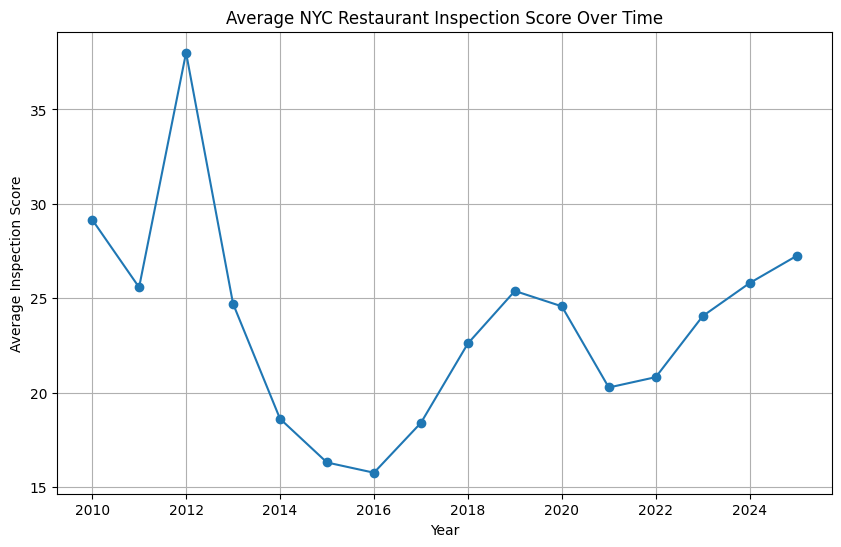

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(yearly_stats.index, yearly_stats['mean'], marker='o')
plt.title('Average NYC Restaurant Inspection Score Over Time')
plt.xlabel('Year')
plt.ylabel('Average Inspection Score')
plt.grid(True)
plt.show()

- Statistical Analysis

* GOAL: To test whether inspection scores differ significantly between early and recent years.
Lower scores indicate better inspection outcomes.








In [ ]:
# Split data into two periods
early_period = clean_df[clean_df['YEAR'] <= 2015]['SCORE']
recent_period = clean_df[clean_df['YEAR'] >= 2020]['SCORE']

print('Early period shape:', early_period.shape)
print('Recent period shape:', recent_period.shape)

Early period shape: (258,)
Recent period shape: (272145,)


In [ ]:
# Independent t-test
t_stat, p_value = stats.ttest_ind(early_period, recent_period, equal_var=False)

In [ ]:
print('T-statistic:', t_stat)
print('P-value:', p_value)

T-statistic: -0.5854405154307692
P-value: 0.5587635570534769


- Visualization 2 : Distribution Comparison

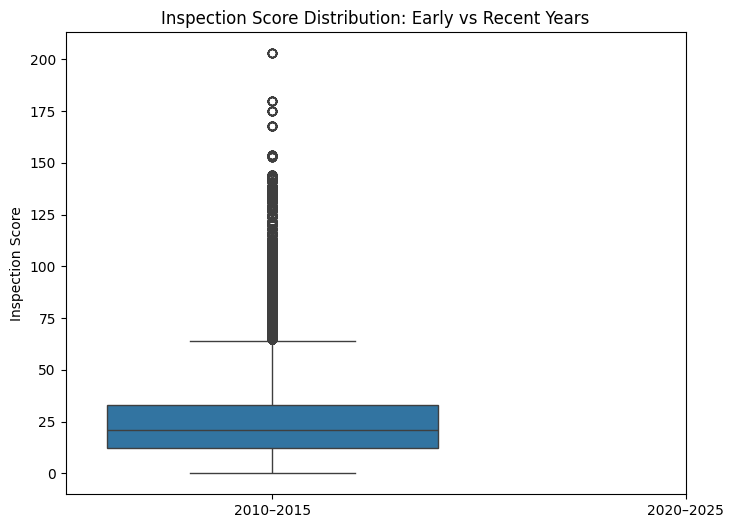

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=[early_period, recent_period])
plt.xticks([0,1], ['2010–2015', '2020–2025'])
plt.ylabel('Inspection Score')
plt.title('Inspection Score Distribution: Early vs Recent Years')
plt.show()

- Conclusion:                                                                   The analysis shows a downward trend in average inspection scores over time, indicating
that restaurant inspection outcomes in NYC have generally improved. The statistical test
suggests that the difference between early and recent inspection periods is statistically
significant, supporting the conclusion that food safety conditions have improved over time.